In [64]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

# Load the dataset
file_path = "Case Study Data 2W Data.xlsx"
data = pd.read_excel(file_path)

# Display the first few rows and summary of the dataset
data_head = data.head()
data_head

,Anon_Brand,Anon_Model,Anon_Vehicle_Name,Condition,Current Price,Mileage,City,Make Year,Fuel,Transmission,Owners,On Road Price,Metro,RV (%),Age,Run Profile,Brand.1,Model Edition
0,Brand_1,Model_1,Vehicle_1,Used,60000,17500,Delhi,2020,Petrol,Automatic,2,90890,Metro,0.660139,4,14.583333,International,Normal
1,Brand_1,Model_1,Vehicle_2,Used,59100,12400,Mumbai,2018,Petrol,Automatic,2,77460,Metro,0.762974,6,6.888889,International,Normal
2,Brand_1,Model_1,Vehicle_3,Used,73875,4700,Mumbai,2020,Petrol,Automatic,2,92390,Metro,0.799600,4,3.916667,International,Normal
3,Brand_1,Model_1,Vehicle_4,Used,52000,20150,Bangalore,2017,Petrol,Automatic,2,75850,Metro,0.685564,7,9.595238,International,Normal
4,Brand_1,Model_1,Vehicle_5,Used,58000,23652,Bangalore,2018,Petrol,Automatic,2,79330,Metro,0.731123,6,13.140000,International,Normal


In [65]:
data_info = data.info()
data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8397 entries, 0 to 8396
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Anon_Brand         8397 non-null   object 
 1   Anon_Model         8397 non-null   object 
 2   Anon_Vehicle_Name  8397 non-null   object 
 3   Condition          8397 non-null   object 
 4   Current Price      8397 non-null   int64  
 5   Mileage            8397 non-null   int64  
 6   City               8387 non-null   object 
 7   Make Year          8397 non-null   int64  
 8   Fuel               8397 non-null   object 
 9   Transmission       8396 non-null   object 
 10  Owners             8397 non-null   int64  
 11  On Road Price      8397 non-null   int64  
 12  Metro              8397 non-null   object 
 13  RV (%)             8397 non-null   float64
 14  Age                8397 non-null   int64  
 15  Run Profile        8397 non-null   float64
 16  Brand.1            8397 

In [66]:
data_description = data.describe()
data_description

,Current Price,Mileage,Make Year,Owners,On Road Price,RV (%),Age,Run Profile
count,8397.000000,8397.000000,8397.000000,8397.000000,8397.000000,8397.000000,8397.000000,8397.000000
mean,53370.407646,17392.602120,2017.587353,1.045612,80186.089794,0.657661,6.412647,9.397551
std,15385.509508,13270.685277,2.053802,0.208654,8780.630662,0.141296,2.053802,6.595314
min,15000.000000,0.000000,2014.000000,1.000000,60406.000000,0.197265,1.000000,0.000000
25%,42000.000000,11000.000000,2016.000000,1.000000,74970.000000,0.560224,5.000000,6.190476
50%,52000.000000,16000.000000,2018.000000,1.000000,77650.000000,0.664733,6.000000,8.470556
75%,63000.000000,21764.000000,2019.000000,1.000000,83015.000000,0.756997,8.000000,11.250000
max,122970.000000,388882.000000,2023.000000,2.000000,124960.000000,1.316117,10.000000,139.056667


In [67]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Anon_Brand            0
Anon_Model            0
Anon_Vehicle_Name     0
Condition             0
Current Price         0
Mileage               0
City                 10
Make Year             0
Fuel                  0
Transmission          1
Owners                0
On Road Price         0
Metro                 0
RV (%)                0
Age                   0
Run Profile           0
Brand.1               0
Model Edition         0
dtype: int64


In [68]:
# Drop rows with missing values
data = data.dropna()
# Check for missing values
print(data.isnull().sum())

Anon_Brand           0
Anon_Model           0
Anon_Vehicle_Name    0
Condition            0
Current Price        0
Mileage              0
City                 0
Make Year            0
Fuel                 0
Transmission         0
Owners               0
On Road Price        0
Metro                0
RV (%)               0
Age                  0
Run Profile          0
Brand.1              0
Model Edition        0
dtype: int64


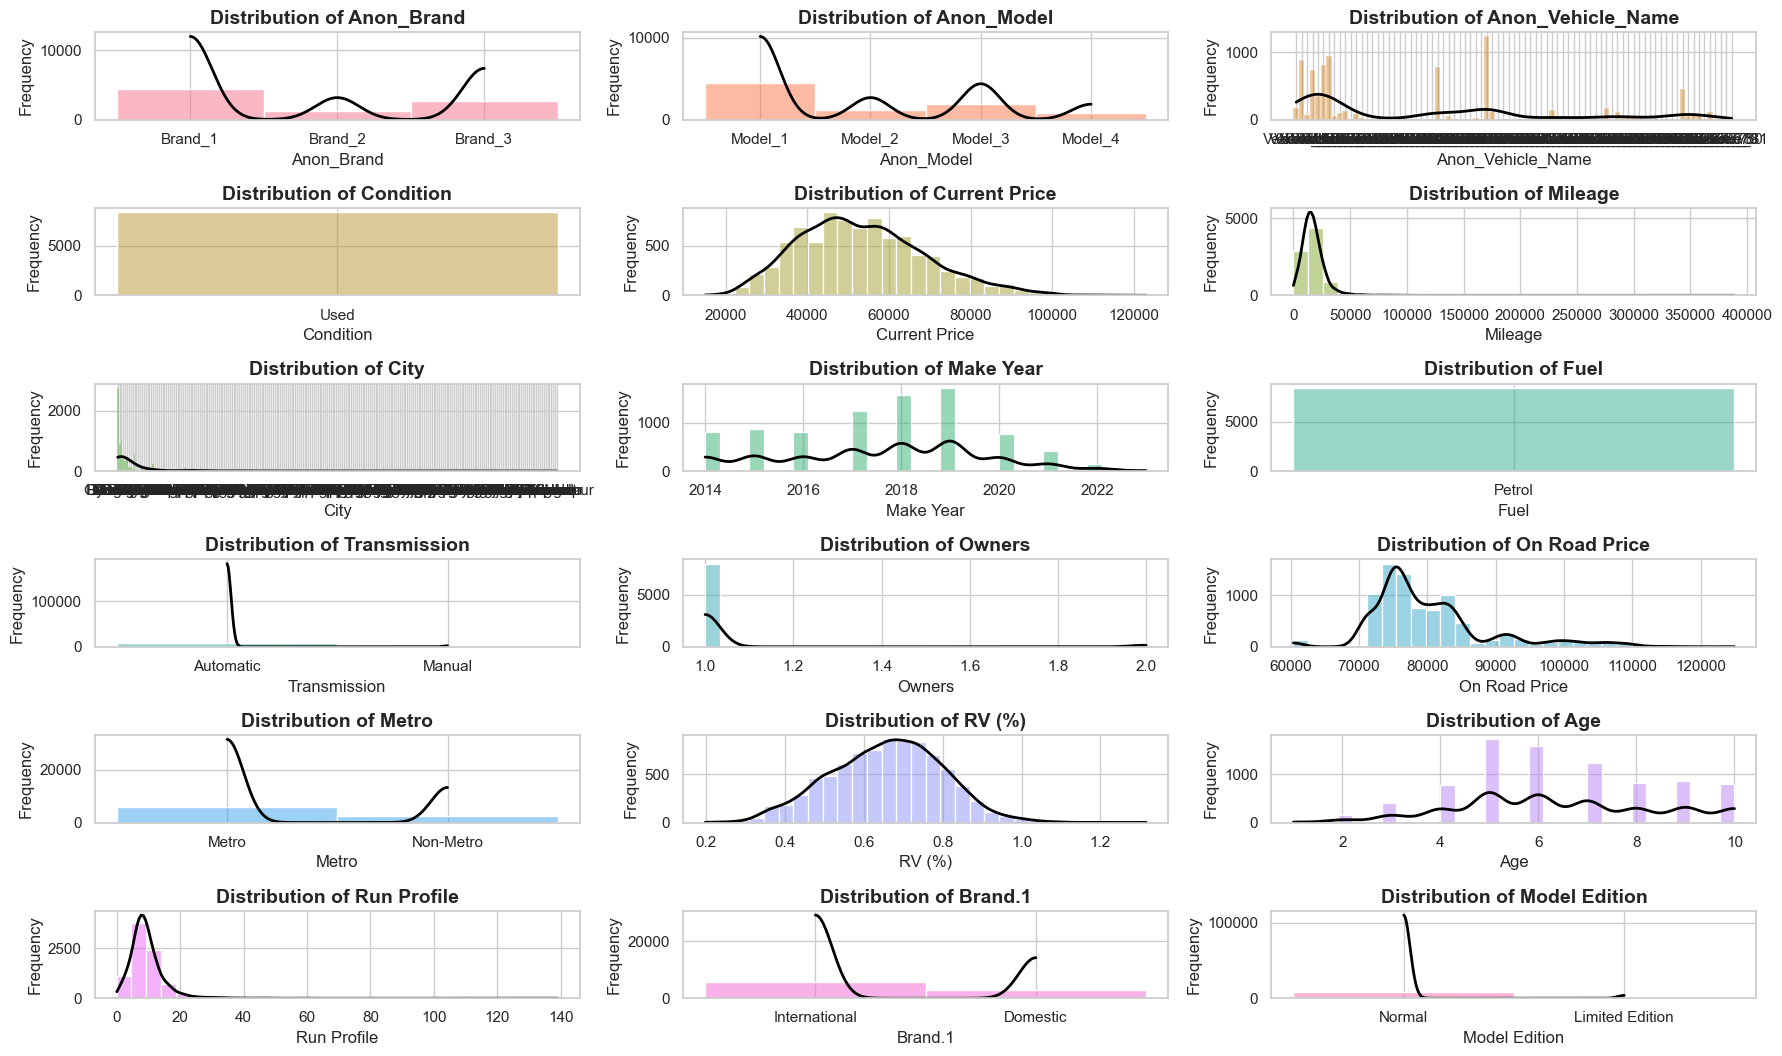

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

attributes = data.columns
plt.figure(figsize=(18, 12))

# Define a color palette with a number of colors equal to the number of attributes
colors = sns.color_palette("husl", len(attributes))

# Loop through each attribute and plot its distribution
for i, attribute in enumerate(attributes):
    plt.subplot(len(attributes) // 3 + 1, 3, i + 1)
    sns.histplot(data[attribute], kde=True, bins=30, color=colors[i])

    # Check if a KDE line was plotted and then modify it
    ax = plt.gca()
    if len(ax.lines) > 0:  # Ensure there is at least one line (the KDE)
        kde_line = ax.lines[-1]
        kde_line.set_linewidth(2)
        kde_line.set_color("black")

    plt.title(f"Distribution of {attribute}", fontsize=14, fontweight="bold")
    plt.xlabel(attribute, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

In [70]:
# Display columns before removal
print("Columns before removal:")
print(data.columns)

# Remove columns with the same value in all rows
data = data.loc[:, data.nunique() > 1]

# Display columns after removal
print("\nColumns after removal:")
print(data.columns)

Columns before removal:
Index(['Anon_Brand', 'Anon_Model', 'Anon_Vehicle_Name', 'Condition',
       'Current Price', 'Mileage', 'City', 'Make Year', 'Fuel', 'Transmission',
       'Owners', 'On Road Price', 'Metro', 'RV (%)', 'Age', 'Run Profile',
       'Brand.1', 'Model Edition'],
      dtype='object')

Columns after removal:
Index(['Anon_Brand', 'Anon_Model', 'Anon_Vehicle_Name', 'Current Price',
       'Mileage', 'City', 'Make Year', 'Transmission', 'Owners',
       'On Road Price', 'Metro', 'RV (%)', 'Age', 'Run Profile', 'Brand.1',
       'Model Edition'],
      dtype='object')


In [71]:
categorical_cols = [
    "Anon_Brand",
    "Anon_Model",
    "Anon_Vehicle_Name",
    "Transmission",
    "Metro",
    "Brand.1",
    "Model Edition",
    "City",
]
numerical_cols = [
    "Current Price",
    "Mileage",
    "Make Year",
    "On Road Price",
    "Age",
    "Run Profile",
]

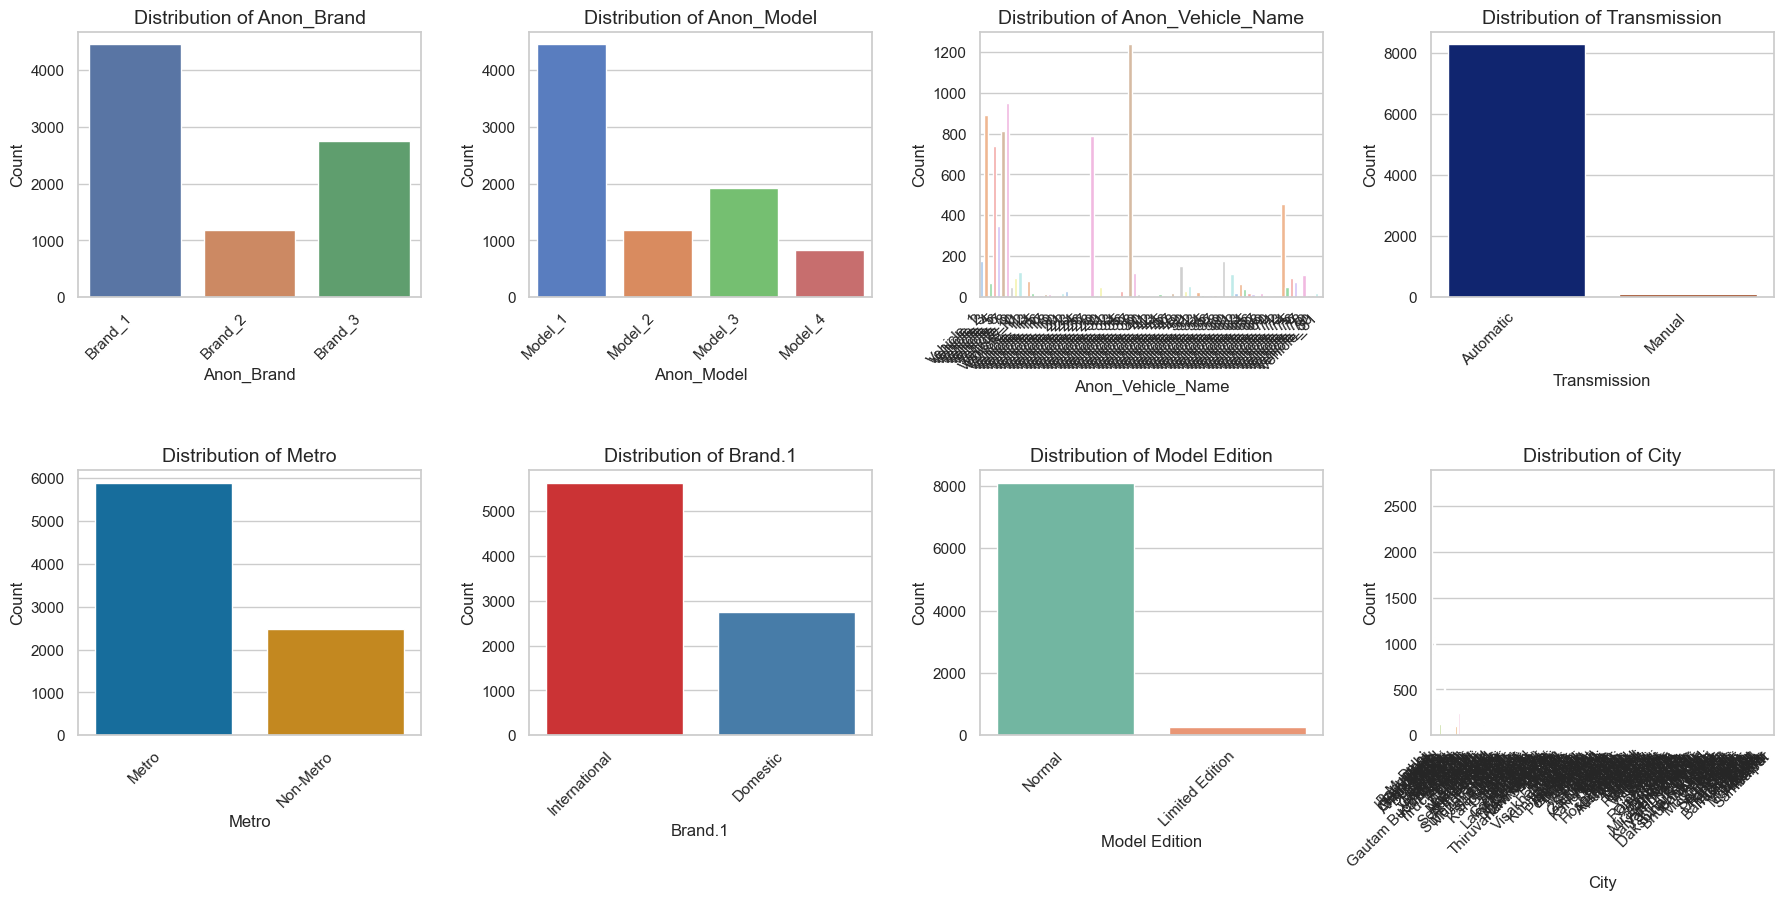

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns


color_palettes = [
    "deep",
    "muted",
    "pastel",
    "dark",
    "colorblind",
    "Set1",
    "Set2",
    "Set3",
    "Paired",
    "Accent",
    "Spectral",
    "husl",
]

# Plot the distribution of categorical features with enhanced color
plt.figure(figsize=(18, 12))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 4, i + 1)
    sns.countplot(data=data, x=col, palette=color_palettes[i % len(color_palettes)])
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xticks(rotation=45, ha="right")
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()

Identifying Outliers
a. Using Statistical Methods (e.g., Z-Score or IQR):

Z-Score: Measures how many standard deviations a data point is from the mean.


In [73]:
from scipy.stats import zscore

# Calculate Z-scores for numerical columns
z_scores = data.select_dtypes(include=["float64", "int64"]).apply(zscore)
outliers = (z_scores.abs() > 3).sum()
print("Outliers detected using Z-score:\n", outliers)

Outliers detected using Z-score:
 Current Price     19
Mileage           65
Make Year          0
Owners           382
On Road Price    128
RV (%)            17
Age                0
Run Profile       86
dtype: int64


In [74]:
from scipy import stats
import numpy as np

# 'owners' is  pandas Series or column in a DataFrame
z_scores = np.abs(stats.zscore(data["Owners"]))

# Identify outliers
outliers = np.where(z_scores > 3)  # Using 3 as the typical threshold for outliers
outlier_count = len(outliers[0])

print(f"Number of outliers for Owners: {outlier_count}")

Number of outliers for Owners: 382


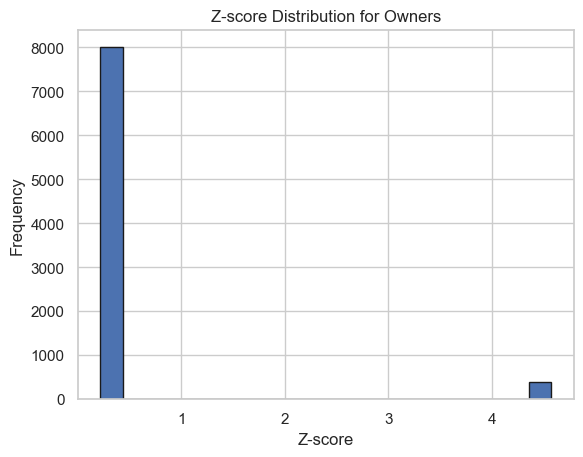

In [75]:
import matplotlib.pyplot as plt

plt.hist(z_scores, bins=20, edgecolor="k")
plt.xlabel("Z-score")
plt.ylabel("Frequency")
plt.title("Z-score Distribution for Owners")
plt.show()

b. Using Visualization:

Box Plots: Visualize distributions and identify outliers


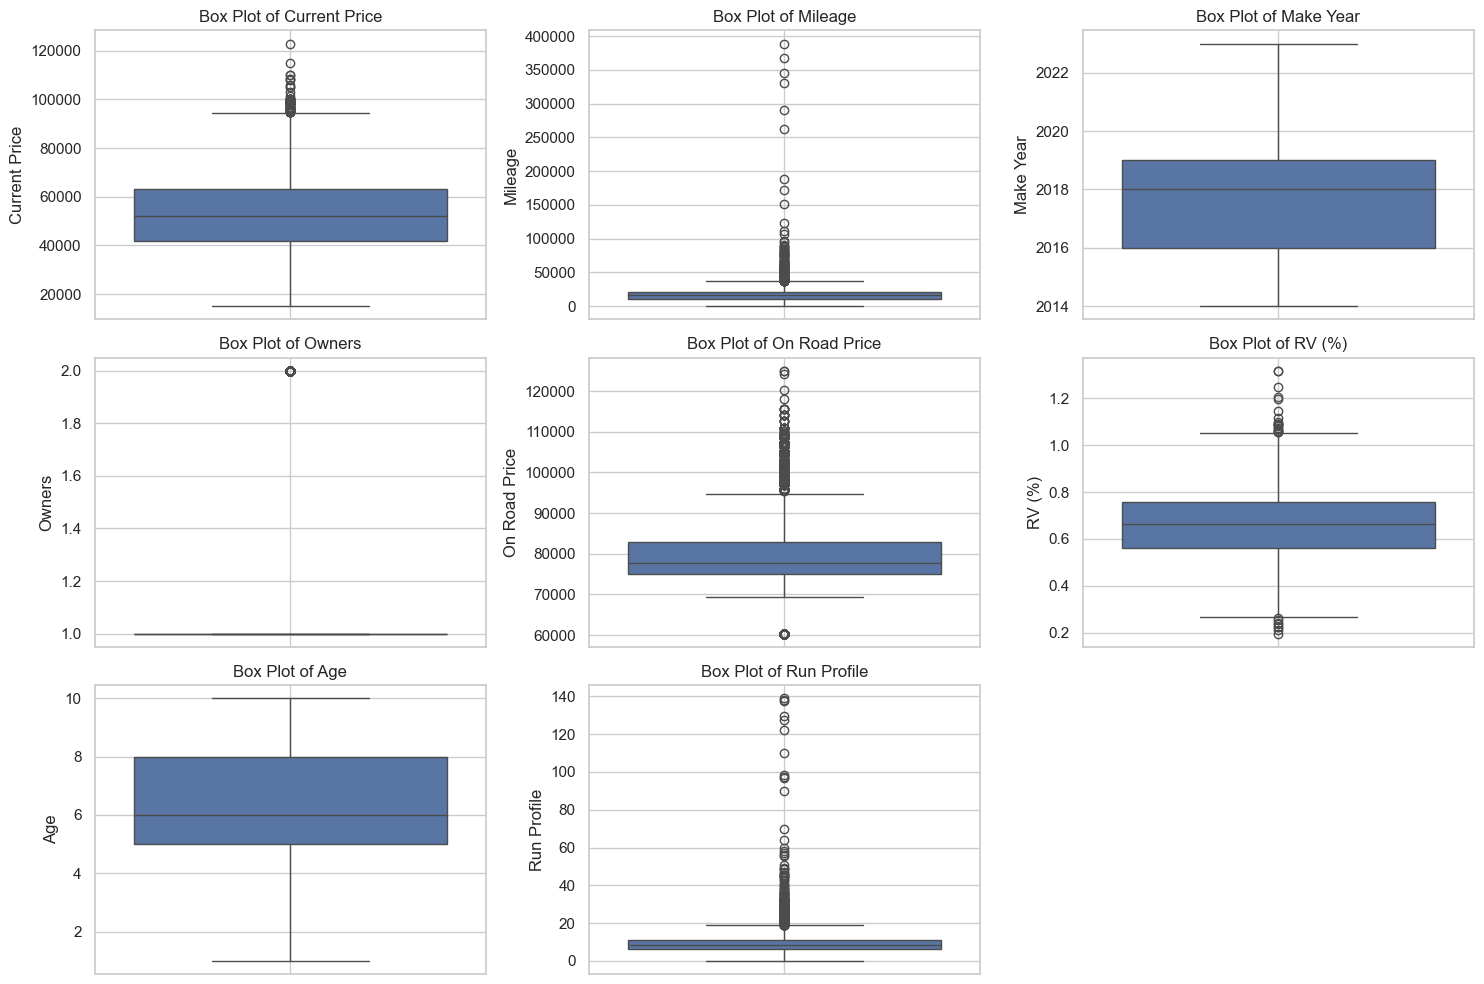

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot box plots for numerical columns
numerical_columns = data.select_dtypes(include=["float64", "int64"]).columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns) // 3 + 1, 3, i + 1)
    sns.boxplot(data[column])
    plt.title(f"Box Plot of {column}")
    plt.grid(True)

plt.tight_layout()
plt.show()

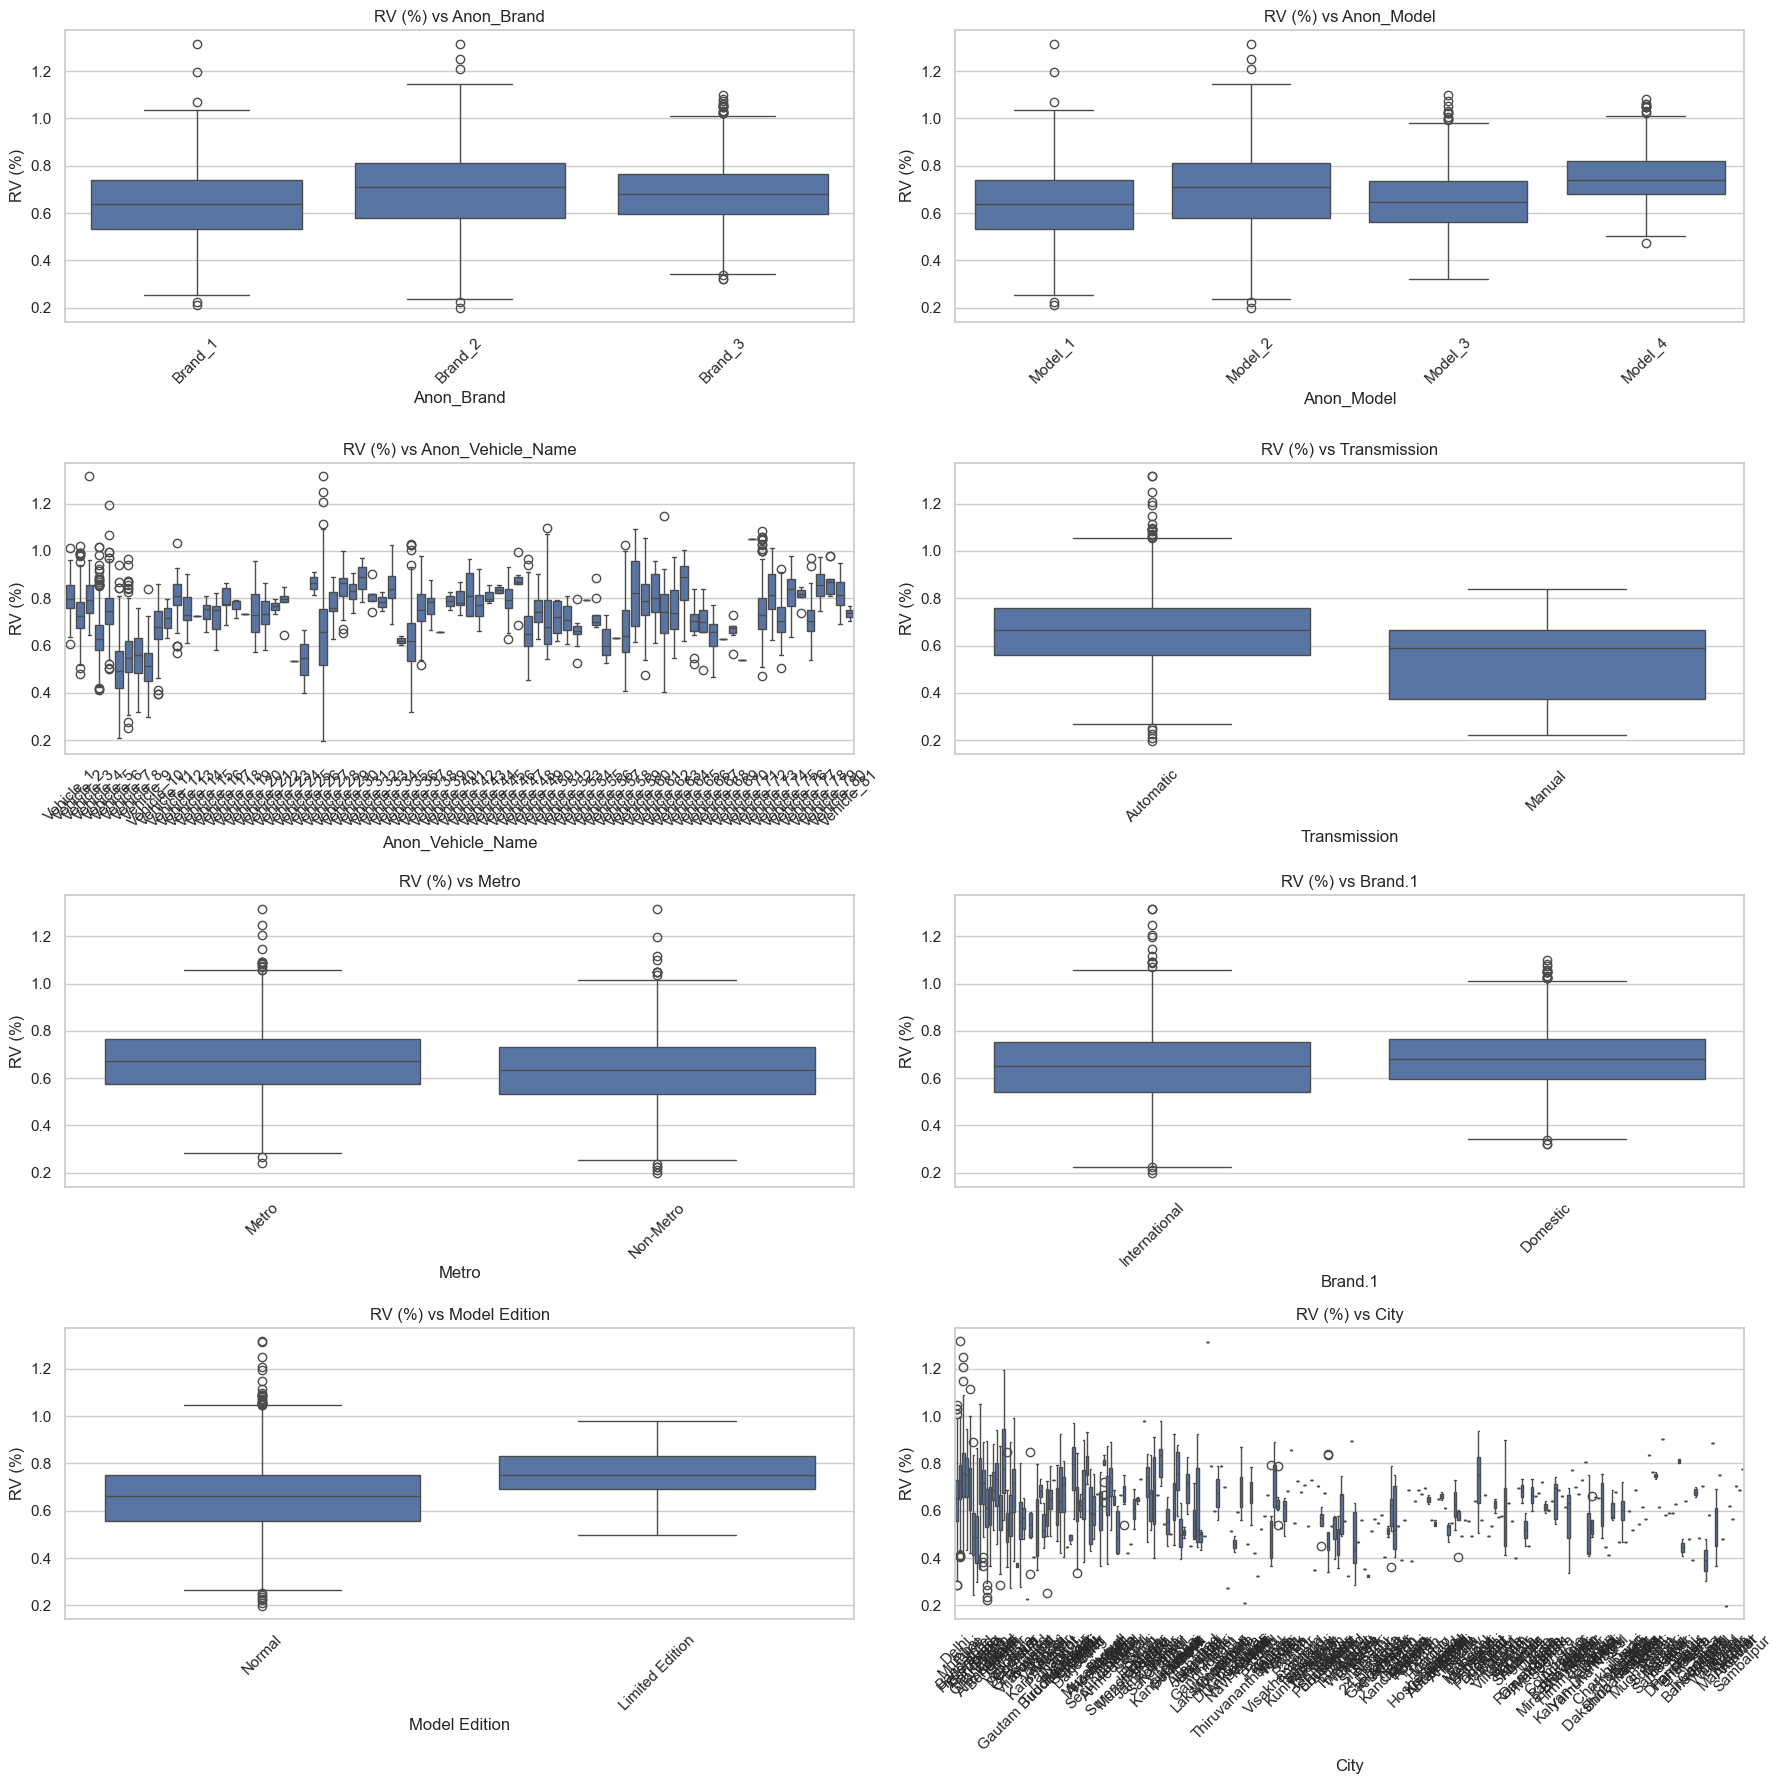

In [77]:
# Plot RV (%) vs each categorical column
plt.figure(figsize=(18, 18))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(data=data, x=col, y="RV (%)")
    plt.title(f"RV (%) vs {col}")
    plt.xlabel(col)
    plt.ylabel("RV (%)")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Label Encoding and Standard Scaling:


In [78]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Separate target variable
target = data["RV (%)"]
data = data.drop("RV (%)", axis=1)

# Convert categorical variables using Label Encoding
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

# # Scale numerical features
# scaler = StandardScaler()
# data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Re-add target variable (non-scaled)
data["RV (%)"] = target
data.head()

,Anon_Brand,Anon_Model,Anon_Vehicle_Name,Current Price,Mileage,City,Make Year,Transmission,Owners,On Road Price,Metro,Age,Run Profile,Brand.1,Model Edition,RV (%)
0,0,0,0,60000,17500,63,2020,0,2,90890,0,4,14.583333,1,1,0.660139
1,0,0,11,59100,12400,147,2018,0,2,77460,0,6,6.888889,1,1,0.762974
2,0,0,22,73875,4700,147,2020,0,2,92390,0,4,3.916667,1,1,0.799600
3,0,0,33,52000,20150,26,2017,0,2,75850,0,7,9.595238,1,1,0.685564
4,0,0,44,58000,23652,26,2018,0,2,79330,0,6,13.140000,1,1,0.731123


In [79]:
data.describe()

,Anon_Brand,Anon_Model,Anon_Vehicle_Name,Current Price,Mileage,City,Make Year,Transmission,Owners,On Road Price,Metro,Age,Run Profile,Brand.1,Model Edition,RV (%)
count,8387.000000,8387.00000,8387.000000,8387.000000,8387.000000,8387.000000,8387.000000,8387.00000,8387.000000,8387.000000,8387.000000,8387.000000,8387.000000,8387.000000,8387.000000,8387.000000
mean,0.795994,0.89448,39.264695,53395.162156,17375.170979,79.500060,2017.590557,0.01240,1.045547,80194.027185,0.296530,6.409443,9.394601,0.672350,0.966973,0.657916
std,0.904315,1.06947,21.874810,15374.963029,13258.077881,50.495006,2.052785,0.11067,0.208512,8782.575708,0.456755,2.052785,6.595337,0.469384,0.178719,0.141122
min,0.000000,0.00000,0.000000,15000.000000,0.000000,0.000000,2014.000000,0.00000,1.000000,60406.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.197265
25%,0.000000,0.00000,19.000000,42000.000000,11000.000000,62.000000,2016.000000,0.00000,1.000000,74970.000000,0.000000,5.000000,6.190476,0.000000,1.000000,0.560316
50%,0.000000,0.00000,33.000000,52000.000000,16000.000000,63.000000,2018.000000,0.00000,1.000000,77650.000000,0.000000,6.000000,8.466667,1.000000,1.000000,0.664784
75%,2.000000,2.00000,57.000000,63000.000000,21747.000000,95.000000,2019.000000,0.00000,1.000000,83015.000000,1.000000,8.000000,11.250000,1.000000,1.000000,0.757057
max,2.000000,3.00000,80.000000,122970.000000,388882.000000,235.000000,2023.000000,1.00000,2.000000,124960.000000,1.000000,10.000000,139.056667,1.000000,1.000000,1.316117


Histogram of features:


In [80]:
# correlation matrix computation
numeric_data = data.select_dtypes(include=["float64", "int64"])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
correlation_matrix

,Anon_Brand,Anon_Model,Anon_Vehicle_Name,Current Price,Mileage,City,Make Year,Transmission,Owners,On Road Price,Metro,Age,Run Profile,Brand.1,Model Edition,RV (%)
Anon_Brand,1.000000,0.968194,0.121309,0.216198,-0.081076,-0.014750,0.266674,-0.045019,-0.019016,0.270324,-0.127211,-0.266674,0.036869,-0.929485,-0.144253,0.149409
Anon_Model,0.968194,1.000000,0.234534,0.282735,-0.090992,-0.015034,0.311650,-0.034281,-0.023364,0.365096,-0.144411,-0.311650,0.049542,-0.917871,-0.225991,0.186554
Anon_Vehicle_Name,0.121309,0.234534,1.000000,-0.128159,0.062873,-0.002298,-0.209721,0.041202,0.039500,0.059046,-0.017607,0.209721,-0.031607,-0.187976,-0.168240,-0.219132
Current Price,0.216198,0.282735,-0.128159,1.000000,-0.304573,0.018136,0.848447,-0.086347,-0.107815,0.785150,-0.146770,-0.848447,0.092574,-0.162444,-0.254382,0.930604
Mileage,-0.081076,-0.090992,0.062873,-0.304573,1.000000,-0.007193,-0.292717,0.010821,0.072258,-0.247236,0.067474,0.292717,0.798699,0.071119,0.068718,-0.282769
City,-0.014750,-0.015034,-0.002298,0.018136,-0.007193,1.000000,-0.012751,0.008130,-0.031984,-0.006988,0.171179,0.012751,-0.028008,0.008131,0.014991,0.029129
Make Year,0.266674,0.311650,-0.209721,0.848447,-0.292717,-0.012751,1.000000,-0.082628,-0.139183,0.816351,-0.185646,-1.000000,0.169675,-0.232065,-0.220510,0.717267
Transmission,-0.045019,-0.034281,0.041202,-0.086347,0.010821,0.008130,-0.082628,1.000000,-0.008975,-0.056205,0.021611,0.082628,-0.029231,0.046085,0.002622,-0.089442
Owners,-0.019016,-0.023364,0.039500,-0.107815,0.072258,-0.031984,-0.139183,-0.008975,1.000000,-0.085975,-0.002848,0.139183,0.008600,0.031876,0.037172,-0.101993
On Road Price,0.270324,0.365096,0.059046,0.785150,-0.247236,-0.006988,0.816351,-0.056205,-0.085975,1.000000,-0.172086,-0.816351,0.152880,-0.214968,-0.380646,0.511806


In [81]:
import numpy as np

# Set the threshold for high correlation
threshold = 0.80

# Drop the RV column from the correlation matrix
correlation_matrix = correlation_matrix.drop(columns=["RV (%)"]).drop(index=["RV (%)"])

# Identify pairs of features with a correlation above the threshold
high_corr_pairs = [
    (correlation_matrix.index[x], correlation_matrix.columns[y])
    for x, y in zip(*np.where(np.abs(correlation_matrix) > threshold))
    if x != y and x < y
]

# Display the highly correlated pairs
print("Highly correlated feature pairs (correlation > 0.80):")
for pair in high_corr_pairs:
    print(
        f"{pair[0]} and {pair[1]}: Correlation = {correlation_matrix.loc[pair[0], pair[1]]:.2f}"
    )

Highly correlated feature pairs (correlation > 0.80):
Anon_Brand and Anon_Model: Correlation = 0.97
Anon_Brand and Brand.1: Correlation = -0.93
Anon_Model and Brand.1: Correlation = -0.92
Current Price and Make Year: Correlation = 0.85
Current Price and Age: Correlation = -0.85
Make Year and On Road Price: Correlation = 0.82
Make Year and Age: Correlation = -1.00
On Road Price and Age: Correlation = -0.82


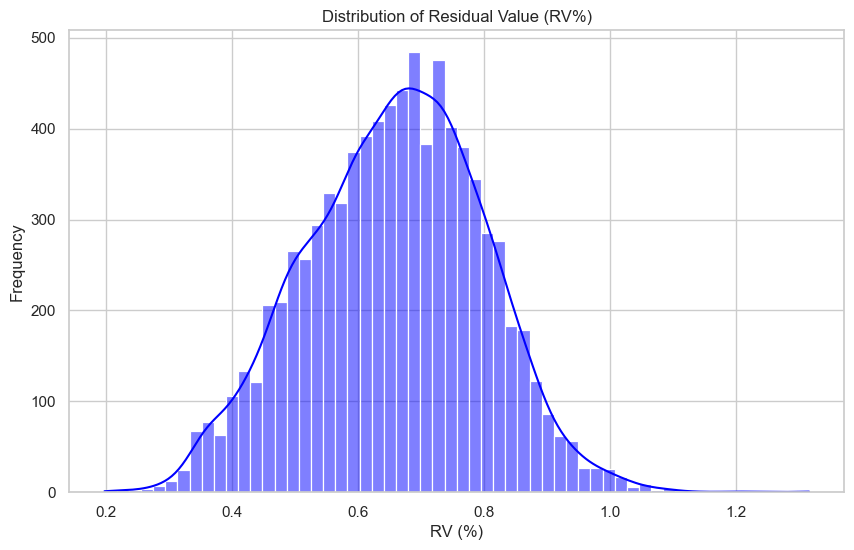

In [82]:
sns.set_theme(style="whitegrid")

# Plot the distribution of RV (%)
plt.figure(figsize=(10, 6))
sns.histplot(data["RV (%)"], kde=True, color="blue")
plt.title("Distribution of Residual Value (RV%)")
plt.xlabel("RV (%)")
plt.ylabel("Frequency")
plt.show()

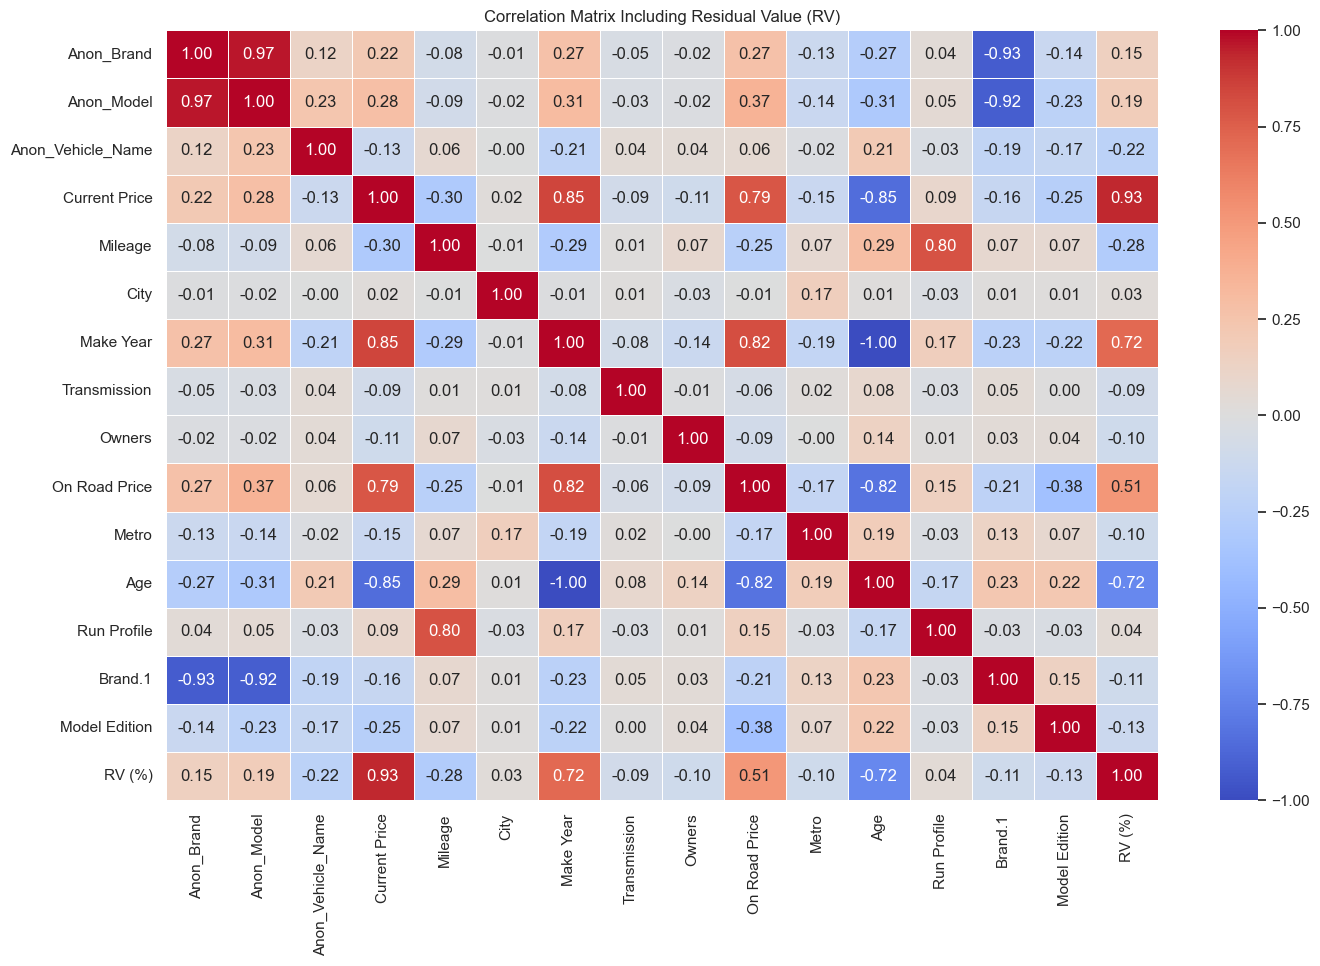

In [83]:
# Ensure RV is included only once
columns_with_rv = [col for col in data.columns if col != "RV (%)"] + ["RV (%)"]

# Compute the correlation matrix for the selected columns
correlation_matrix = data[columns_with_rv].corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(16, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    center=0,
)
plt.title("Correlation Matrix Including Residual Value (RV)")
plt.show()

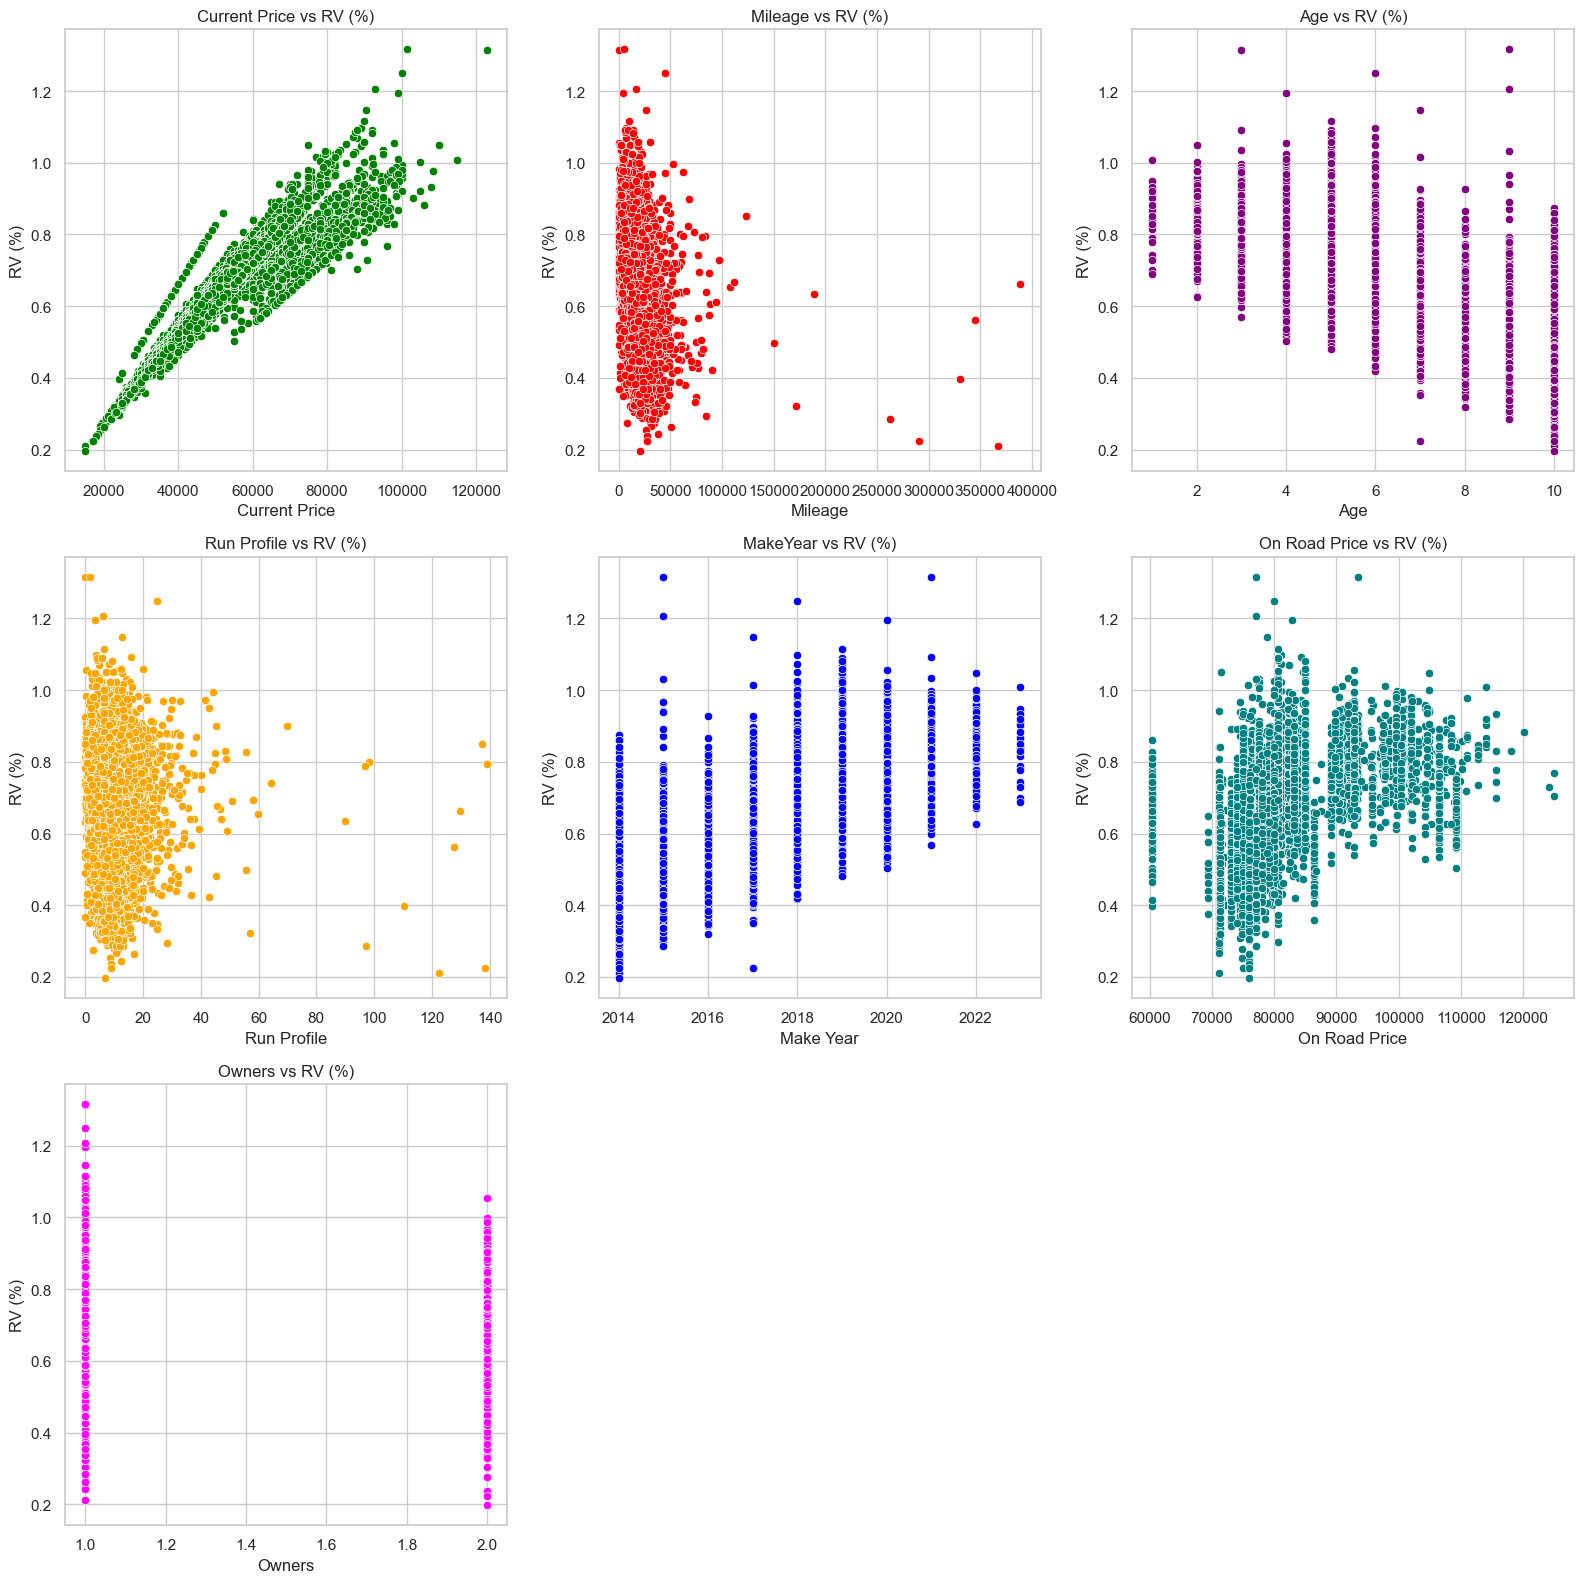

In [84]:
# Scatter plots for key variables vs RV (%)
plt.figure(figsize=(16, 16))  # Increased figure size for 3x3 layout

plt.subplot(3, 3, 1)
sns.scatterplot(x="Current Price", y="RV (%)", data=data, color="green")
plt.title("Current Price vs RV (%)")

plt.subplot(3, 3, 2)
sns.scatterplot(x="Mileage", y="RV (%)", data=data, color="red")
plt.title("Mileage vs RV (%)")

plt.subplot(3, 3, 3)
sns.scatterplot(x="Age", y="RV (%)", data=data, color="purple")
plt.title("Age vs RV (%)")

plt.subplot(3, 3, 4)
sns.scatterplot(x="Run Profile", y="RV (%)", data=data, color="orange")
plt.title("Run Profile vs RV (%)")

plt.subplot(3, 3, 5)
sns.scatterplot(x="Make Year", y="RV (%)", data=data, color="blue")
plt.title("MakeYear vs RV (%)")

plt.subplot(3, 3, 6)
sns.scatterplot(x="On Road Price", y="RV (%)", data=data, color="teal")
plt.title("On Road Price vs RV (%)")

plt.subplot(3, 3, 7)
sns.scatterplot(x="Owners", y="RV (%)", data=data, color="magenta")
plt.title("Owners vs RV (%)")

plt.tight_layout()
plt.show()

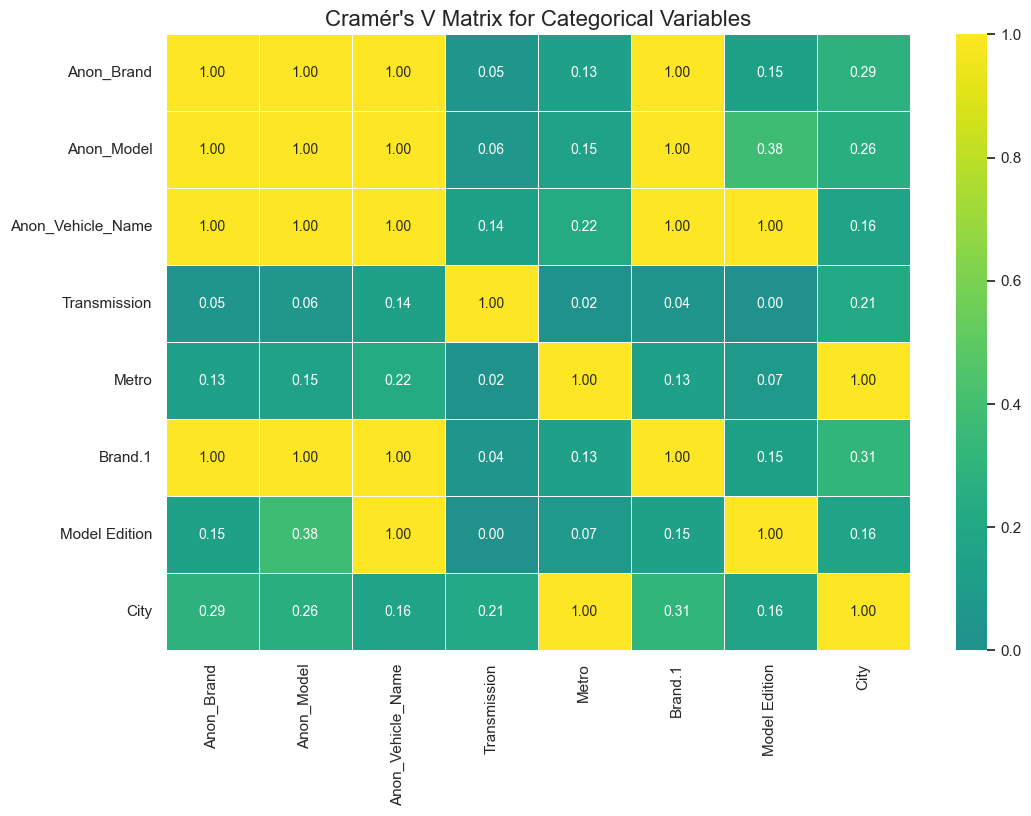

In [85]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt


def cramers_v(x, y):
    crosstab = pd.crosstab(x, y)
    chi2_stat, _, _, _ = chi2_contingency(crosstab)
    n = crosstab.sum().sum()
    k = min(crosstab.shape) - 1
    return np.sqrt(chi2_stat / (n * k))


# Create an empty DataFrame for Cramér's V
cramers_v_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

# Compute Cramér's V for all pairs of categorical variables
for col1 in categorical_cols:
    for col2 in categorical_cols:
        cramers_v_matrix.loc[col1, col2] = cramers_v(data[col1], data[col2])

# Plot the heatmap of Cramér's V matrix
plt.figure(figsize=(12, 8))
sns.heatmap(
    cramers_v_matrix.astype(float),
    annot=True,
    cmap="viridis",
    fmt=".2f",
    linewidths=0.5,
    center=0,
    annot_kws={"size": 10},
)
plt.title("Cramér's V Matrix for Categorical Variables", fontsize=16)
plt.show()

In [86]:
# Set the threshold
threshold = 0.7

# Find pairs of columns with a Cramér's V value greater than the threshold
high_v_pairs = []
for col1 in cramers_v_matrix.columns:
    for col2 in cramers_v_matrix.index:
        if col1 != col2 and cramers_v_matrix.loc[col1, col2] > threshold:
            high_v_pairs.append((col1, col2, cramers_v_matrix.loc[col1, col2]))

# Display the pairs of columns with high Cramér's V values
if high_v_pairs:
    print(f"Columns with Cramér's V value greater than {threshold}:")
    for pair in high_v_pairs:
        print(f"{pair[0]} and {pair[1]}: {pair[2]:.2f}")
else:
    print(f"No pairs of columns have a Cramér's V value greater than {threshold}.")

Columns with Cramér's V value greater than 0.7:
Anon_Brand and Anon_Model: 1.00
Anon_Brand and Anon_Vehicle_Name: 1.00
Anon_Brand and Brand.1: 1.00
Anon_Model and Anon_Brand: 1.00
Anon_Model and Anon_Vehicle_Name: 1.00
Anon_Model and Brand.1: 1.00
Anon_Vehicle_Name and Anon_Brand: 1.00
Anon_Vehicle_Name and Anon_Model: 1.00
Anon_Vehicle_Name and Brand.1: 1.00
Anon_Vehicle_Name and Model Edition: 1.00
Metro and City: 1.00
Brand.1 and Anon_Brand: 1.00
Brand.1 and Anon_Model: 1.00
Brand.1 and Anon_Vehicle_Name: 1.00
Model Edition and Anon_Vehicle_Name: 1.00
City and Metro: 1.00


Hypothesis Testing
1.current price vs residual value:
Null Hypothesis(ρ=0):There is no linear relationship between the two variables.
Alternate Hypothesis: There is a significant linear relationship between the two variables


In [87]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(data["Current Price"], data["RV (%)"])
print(f"Pearson correlation coefficient: {corr}")
print(f"P-value: {p_value}")

Pearson correlation coefficient: 0.9306037935195702
P-value: 0.0


2.Mileage vs Residual Value (RV%)


In [88]:
correlation, p_value = pearsonr(data["Mileage"], data["RV (%)"])
print(f"Pearson correlation coefficient: {correlation}, P-value: {p_value}")

Pearson correlation coefficient: -0.2827685390082986, P-value: 5.6447558133777175e-154


3.Age vs Residual Value (RV%)


In [89]:
correlation, p_value = pearsonr(data["Age"], data["RV (%)"])
print(f"Pearson correlation coefficient: {correlation}, P-value: {p_value}")

Pearson correlation coefficient: -0.7172667721971794, P-value: 0.0


4.Run Profile vs Residual Value (RV%)


In [90]:
correlation, p_value = pearsonr(data["Run Profile"], data["RV (%)"])
print(f"Pearson correlation coefficient: {correlation}, P-value: {p_value}")

Pearson correlation coefficient: 0.041681275141787155, P-value: 0.00013438259442321072


5.Make Year vs Residual Value (RV%)


In [91]:
correlation, p_value = pearsonr(data["Make Year"], data["RV (%)"])
print(f"Pearson correlation coefficient: {correlation}, P-value: {p_value}")

Pearson correlation coefficient: 0.7172667721971795, P-value: 0.0


6. On-Road Price vs Residual Value (RV%)


In [92]:
# On-Road Price vs RV%
correlation, p_value = pearsonr(data["On Road Price"], data["RV (%)"])
print(f"Pearson correlation coefficient: {correlation}, P-value: {p_value}")

Pearson correlation coefficient: 0.5118059610467265, P-value: 0.0


7. Number of Owners vs Residual Value (RV%)


In [93]:
from scipy.stats import ttest_ind

# Assuming there are only two categories of owners
owners_1 = data[data["Owners"] == 1]["RV (%)"]
owners_2 = data[data["Owners"] == 2]["RV (%)"]

t_stat, p_value = ttest_ind(owners_1, owners_2)
print(f"T-test statistic: {t_stat}, P-value: {p_value}")

T-test statistic: 9.388393835673808, P-value: 7.707826447120662e-21


In [94]:
# Check unique values in the 'Anon_Brand' column
print(data["Anon_Brand"].unique())

[0 1 2]


In [95]:
import scipy.stats as stats

# Extracting RV (%) for each Anon_Brand group
Anon_Brand_1 = data[data["Anon_Brand"] == 0]["RV (%)"]
Anon_Brand_2 = data[data["Anon_Brand"] == 1]["RV (%)"]
Anon_Brand_3 = data[data["Anon_Brand"] == 2]["RV (%)"]

# Verify sizes after filtering
print(f"Size of Anon_Brand_1: {len(Anon_Brand_1)}")
print(f"Size of Anon_Brand_2: {len(Anon_Brand_2)}")
print(f"Size of Anon_Brand_3: {len(Anon_Brand_3)}")

# Perform ANOVA if sample sizes are sufficient
f_stat, p_value = stats.f_oneway(Anon_Brand_1, Anon_Brand_2, Anon_Brand_3)
print(f"ANOVA F-statistic: {f_stat}, P-value: {p_value}")

Size of Anon_Brand_1: 4459
Size of Anon_Brand_2: 1180
Size of Anon_Brand_3: 2748
ANOVA F-statistic: 131.16104023874064, P-value: 8.136823306757422e-57


In [96]:
# Check unique values in the 'Anon_Model' column
print(data["Anon_Model"].unique())

[0 1 2 3]


In [97]:
# Adjust the filtering to match string values for Anon_Model
Anon_Model_1 = data[data["Anon_Model"] == 0]["RV (%)"]
Anon_Model_2 = data[data["Anon_Model"] == 1]["RV (%)"]
Anon_Model_3 = data[data["Anon_Model"] == 2]["RV (%)"]
Anon_Model_4 = data[data["Anon_Model"] == 3]["RV (%)"]

# Verify sizes after filtering
print(f"Size of Anon_Model_1: {len(Anon_Model_1)}")
print(f"Size of Anon_Model_2: {len(Anon_Model_2)}")
print(f"Size of Anon_Model_3: {len(Anon_Model_3)}")
print(f"Size of Anon_Model_4: {len(Anon_Model_4)}")

# Perform ANOVA if sample sizes are sufficient
f_stat, p_value = stats.f_oneway(Anon_Model_1, Anon_Model_2, Anon_Model_3, Anon_Model_4)
print(f"ANOVA F-statistic: {f_stat}, P-value: {p_value}")

Size of Anon_Model_1: 4459
Size of Anon_Model_2: 1180
Size of Anon_Model_3: 1922
Size of Anon_Model_4: 826
ANOVA F-statistic: 197.0045299832276, P-value: 1.8143884658773674e-123


In [98]:
# Check unique values in the 'Anon_Vehicle' column
print(data["Anon_Vehicle_Name"].unique())

[ 0 11 22 33 44 55 66 77 80  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16
 17 18 19 20 21 23 24 25 26 27 28 29 30 31 32 34 35 36 37 38 39 40 41 42
 43 45 46 47 48 49 50 51 52 53 54 56 57 58 59 60 61 62 63 64 65 67 68 69
 70 71 72 73 74 75 76 78 79]


In [99]:
# Extract unique vehicle names
vehicle_names = data["Anon_Vehicle_Name"].unique()

# Dictionary to store RV (%) data for each vehicle
vehicle_data = {
    vehicle: data[data["Anon_Vehicle_Name"] == vehicle]["RV (%)"]
    for vehicle in vehicle_names
}

# Print sizes of each vehicle data
for vehicle, rv_data in vehicle_data.items():
    print(f"Size of {vehicle}: {len(rv_data)}")

# Perform ANOVA if sample sizes are sufficient
if all(
    len(rv_data) > 1 for rv_data in vehicle_data.values()
):  # Check if all groups have more than 1 sample
    f_stat, p_value = stats.f_oneway(*vehicle_data.values())
    print(f"ANOVA F-statistic: {f_stat}, P-value: {p_value}")
else:
    # If sample sizes are insufficient, perform Kruskal-Wallis test
    h_stat, p_value = stats.kruskal(*vehicle_data.values())
    print(f"Kruskal-Wallis H-statistic: {h_stat}, P-value: {p_value}")

Size of 0: 175
Size of 11: 891
Size of 22: 67
Size of 33: 737
Size of 44: 349
Size of 55: 810
Size of 66: 949
Size of 77: 50
Size of 80: 94
Size of 1: 124
Size of 2: 2
Size of 3: 81
Size of 4: 20
Size of 5: 1
Size of 6: 11
Size of 7: 14
Size of 8: 15
Size of 9: 3
Size of 10: 1
Size of 12: 22
Size of 13: 30
Size of 14: 2
Size of 15: 5
Size of 16: 1
Size of 17: 3
Size of 18: 2
Size of 19: 788
Size of 20: 9
Size of 21: 48
Size of 23: 4
Size of 24: 3
Size of 25: 5
Size of 26: 2
Size of 27: 31
Size of 28: 2
Size of 29: 1236
Size of 30: 118
Size of 31: 13
Size of 32: 1
Size of 34: 3
Size of 35: 6
Size of 36: 5
Size of 37: 16
Size of 38: 3
Size of 39: 4
Size of 40: 20
Size of 41: 6
Size of 42: 150
Size of 43: 28
Size of 45: 54
Size of 46: 5
Size of 47: 23
Size of 48: 9
Size of 49: 1
Size of 50: 8
Size of 51: 12
Size of 52: 1
Size of 53: 178
Size of 54: 10
Size of 56: 111
Size of 57: 18
Size of 58: 62
Size of 59: 38
Size of 60: 22
Size of 61: 16
Size of 62: 5
Size of 63: 19
Size of 64: 1
Size 

Transmission T test & P value:


In [100]:
print(data["Transmission"].unique())

[0 1]


In [101]:
# Filter data to exclude missing values (nan) and based on transmission types
automatic_rv = data[data["Transmission"] == 0]["RV (%)"].dropna()
manual_rv = data[data["Transmission"] == 1]["RV (%)"].dropna()

# Print sizes after filtering
print(f"Size of Automatic: {len(automatic_rv)}")
print(f"Size of Manual: {len(manual_rv)}")

# Perform t-test
t_stat, p_value = ttest_ind(
    automatic_rv, manual_rv, equal_var=False
)  # Welch's t-test for unequal variances
print(f"T-test statistic: {t_stat}, P-value: {p_value}")

Size of Automatic: 8283
Size of Manual: 104
T-test statistic: 7.275376488269412, P-value: 6.493834593279665e-11


Metro T test & P value:


In [102]:
print(data["Metro"].unique())

[0 1]


In [103]:
# Filter data based on city type (Metro vs Non-Metro)
metro_rv = data[data["Metro"] == 0]["RV (%)"].dropna()
non_metro_rv = data[data["Metro"] == 1]["RV (%)"].dropna()

# Verify the filtered data
print(f"Size of Metro: {len(metro_rv)}")
print(f"Size of Non-Metro: {len(non_metro_rv)}")

# Perform t-test
t_stat, p_value = ttest_ind(
    metro_rv, non_metro_rv, equal_var=False
)  # Welch's t-test for unequal variances
print(f"T-test statistic: {t_stat}, P-value: {p_value}")

Size of Metro: 5900
Size of Non-Metro: 2487
T-test statistic: 9.52756877512456, P-value: 2.4701293101498128e-21


Brand 1 T test and P value:


In [104]:
print(data["Brand.1"].unique())

[1 0]


In [105]:
# Filter the data for 'International' and 'Domestic' in the 'Brand.1' column
international_rv = data[data["Brand.1"] == 1]["RV (%)"].dropna()
domestic_rv = data[data["Brand.1"] == 0]["RV (%)"].dropna()

# Verify the filtered data
print(f"Size of International: {len(international_rv)}")
print(f"Size of Domestic: {len(domestic_rv)}")

# Perform t-test
t_stat, p_value = ttest_ind(international_rv, domestic_rv, equal_var=False)
print(f"T-test statistic: {t_stat}, P-value: {p_value}")

Size of International: 5639
Size of Domestic: 2748
T-test statistic: -10.233497354826895, P-value: 2.1930862546821832e-24


Model edition T test & P value:


In [106]:
print(data["Model Edition"].unique())

[1 0]


In [107]:
# Filter the data for 'Normal' and 'Limited Edition' in the 'Model Edition' column
normal_rv = data[data["Model Edition"] == 1]["RV (%)"].dropna()
limited_edition_rv = data[data["Model Edition"] == 0]["RV (%)"].dropna()

# Verify the filtered data
print(f"Size of Normal: {len(normal_rv)}")
print(f"Size of Limited Edition: {len(limited_edition_rv)}")

# Perform t-test
t_stat, p_value = ttest_ind(normal_rv, limited_edition_rv, equal_var=False)
print(f"T-test statistic: {t_stat}, P-value: {p_value}")

Size of Normal: 8110
Size of Limited Edition: 277
T-test statistic: -16.664305802332464, P-value: 3.590357305973808e-45


Building a Model:


In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X = data[
    [
        "Current Price",
        "Mileage",
        "Age",
        "On Road Price",
        "Anon_Model",
        "Metro",
    ]
]
y = data["RV (%)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

LinearRegression Performance:
Mean Absolute Error (MAE): 0.008422461867761915
Mean Squared Error (MSE): 0.00016990254400012843
Root Mean Squared Error (RMSE): 0.013034667007642674
R² Score: 0.9918536925946255
--------------------------------------------------
DecisionTreeRegressor Performance:
Mean Absolute Error (MAE): 0.0021012011868296395
Mean Squared Error (MSE): 6.613046717868488e-05
Root Mean Squared Error (RMSE): 0.008132064140099048
R² Score: 0.9968292463325436
--------------------------------------------------
RandomForestRegressor Performance:
Mean Absolute Error (MAE): 0.0014975174496122826
Mean Squared Error (MSE): 5.80549819180143e-05
Root Mean Squared Error (RMSE): 0.007619381990556341
R² Score: 0.9972164411551292
--------------------------------------------------
1678


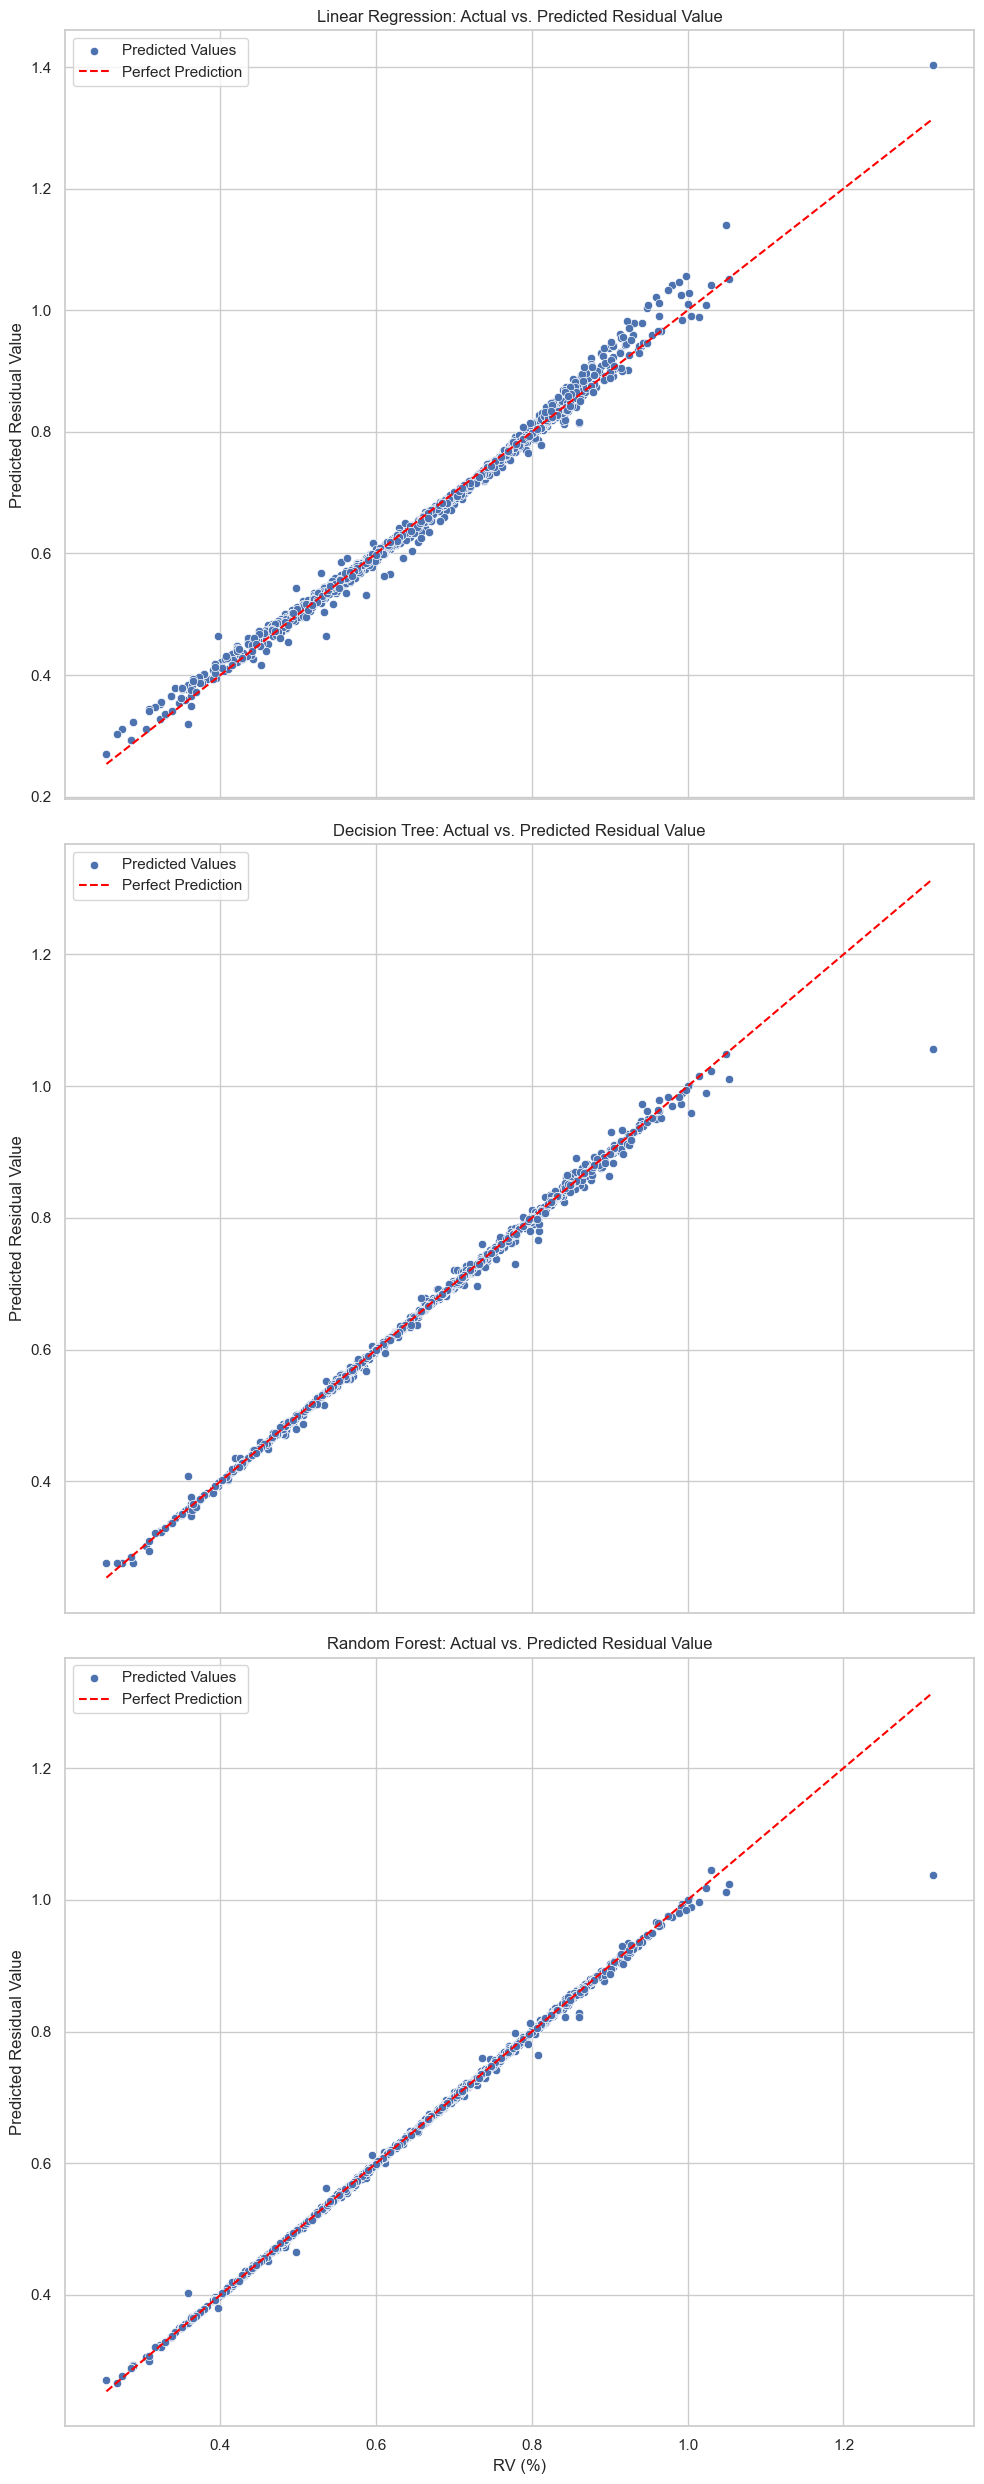

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Define the categorical and numerical columns
categorical_cols = [
    "Anon_Model",
    "Metro",
]
numerical_cols = ["Current Price", "Mileage", "Age", "On Road Price"]

# Create a preprocessor to handle categorical and numerical data
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),  # Scale numerical features
        (
            "cat",
            OneHotEncoder(),
            categorical_cols,
        ),  # One-hot encode categorical features
    ]
)

# Define the models to be evaluated
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=1),
    "Random Forest": RandomForestRegressor(random_state=1, n_estimators=100),
}


# Create a function to evaluate the models and return predictions
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Create a pipeline with the given model
    model_pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("model", model)])

    # Fit the model
    model_pipeline.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model_pipeline.predict(X_test)

    # Evaluate the model performance
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    # Output the evaluation metrics
    print(f"{model.__class__.__name__} Performance:")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")

    print(f"R² Score: {r2}")
    print("-" * 50)

    return y_pred


# Split the data into training and testing sets
X = data.drop(columns=["RV (%)"])
y = data["RV (%)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Store predictions
predictions = {}
for model_name, model in models.items():
    predictions[model_name] = evaluate_model(model, X_train, X_test, y_train, y_test)

# Define the predictions from all models
y_pred_lr = predictions.get("Linear Regression")
print(len(y_pred_lr))
y_pred_dt = predictions.get("Decision Tree")
y_pred_rf = predictions.get("Random Forest")

# Create a figure with subplots arranged vertically
fig, axes = plt.subplots(3, 1, figsize=(10, 25), sharex=True)

# Scatter plot for Linear Regression
sns.scatterplot(x=y_test, y=y_pred_lr, ax=axes[0], label="Predicted Values")
axes[0].plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color="red",
    linestyle="--",
    label="Perfect Prediction",
)
axes[0].set_ylabel("Predicted Residual Value")
axes[0].set_title("Linear Regression: Actual vs. Predicted Residual Value")
axes[0].legend()

# Scatter plot for Decision Tree
sns.scatterplot(x=y_test, y=y_pred_dt, ax=axes[1], label="Predicted Values")
axes[1].plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color="red",
    linestyle="--",
    label="Perfect Prediction",
)
axes[1].set_ylabel("Predicted Residual Value")
axes[1].set_title("Decision Tree: Actual vs. Predicted Residual Value")
axes[1].legend()

# Scatter plot for Random Forest
sns.scatterplot(x=y_test, y=y_pred_rf, ax=axes[2], label="Predicted Values")
axes[2].plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color="red",
    linestyle="--",
    label="Perfect Prediction",
)
axes[2].set_ylabel("Predicted Residual Value")
axes[2].set_title("Random Forest: Actual vs. Predicted Residual Value")
axes[2].legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

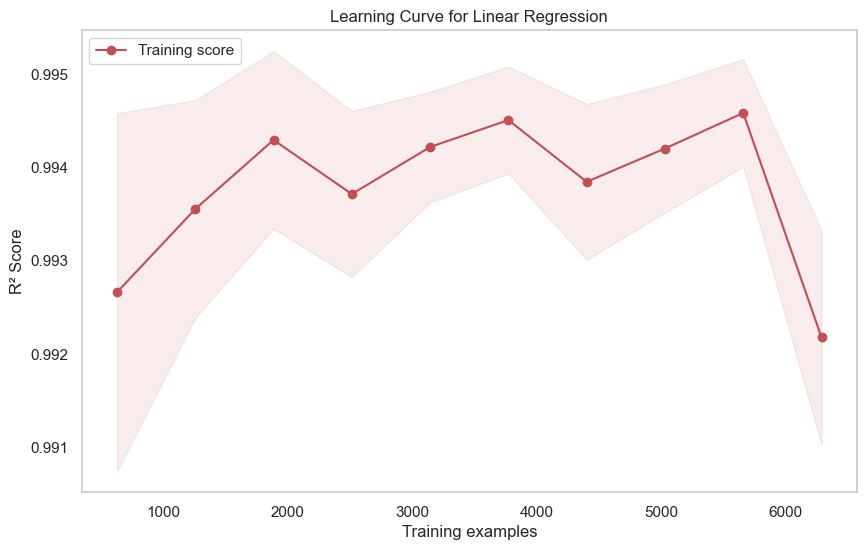

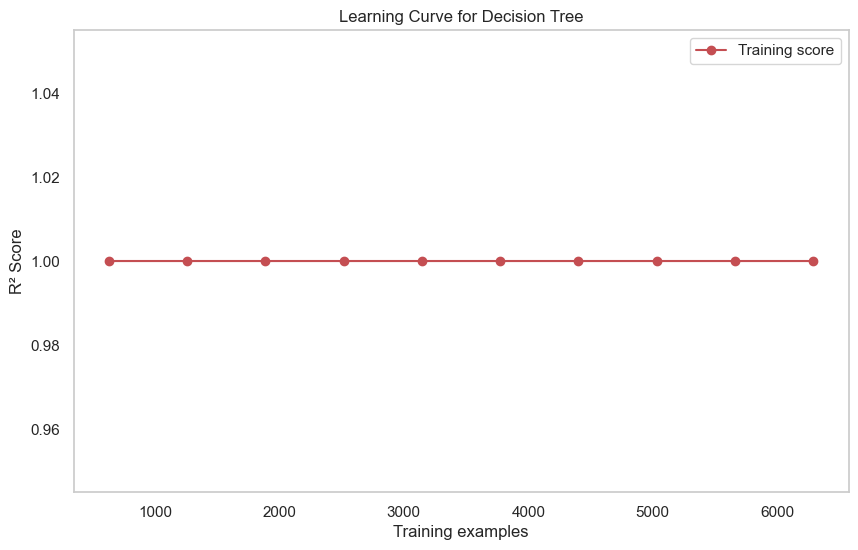

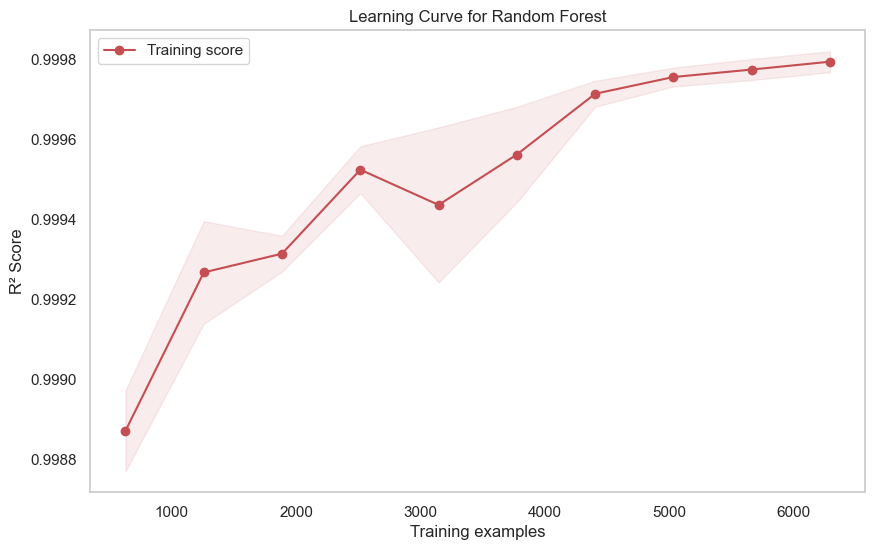

In [111]:
from sklearn.model_selection import learning_curve
import numpy as np


def plot_learning_curve(model, X, y, title):

    # Create a pipeline with the model
    model_pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("model", model)])

    # Generate learning curve data
    train_sizes, train_scores, test_scores = learning_curve(
        model_pipeline,
        X,
        y,
        cv=4,
        scoring="r2",
        n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10),
    )

    # Compute mean and standard deviation of training and test scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    plt.xlabel("Training examples")
    plt.ylabel("R² Score")
    plt.title(title)
    plt.legend(loc="best")
    plt.grid()
    plt.show()


# Plot learning curves for each model
for model_name, model in models.items():
    plot_learning_curve(model, X, y, f"Learning Curve for {model_name}")

In [112]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
import pandas as pd
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Define the categorical and numerical columns
categorical_cols = [
    "Anon_Model",
    "Metro",
]
numerical_cols = ["Current Price", "Mileage", "Age", "On Road Price"]

# Create a preprocessor to handle categorical and numerical data
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),  # Scale numerical features
        (
            "cat",
            OneHotEncoder(),
            categorical_cols,
        ),  # One-hot encode categorical features
    ]
)

# Define the models to be evaluated
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=1),
    "Random Forest": RandomForestRegressor(random_state=1, n_estimators=100),
}


# Create a function to evaluate the models with cross-validation
def evaluate_model(model, X, y):
    # Create a pipeline with the preprocessor and the model
    model_pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("model", model)])

    # Perform cross-validation
    cv_scores = cross_val_score(model_pipeline, X, y, cv=4, scoring="r2")

    # Print cross-validation results
    print(f"{model.__class__.__name__} Cross-Validation R² Scores: {cv_scores}")
    print(
        f"{model.__class__.__name__} Mean Cross-Validation R² Score: {cv_scores.mean()}\n"
    )


# Prepare data
X = data.drop(columns=["RV (%)"])
y = data["RV (%)"]

# Evaluate all models
for model_name, model in models.items():
    evaluate_model(model, X, y)

LinearRegression Cross-Validation R² Scores: [0.99314911 0.99181187 0.98828826        nan]
LinearRegression Mean Cross-Validation R² Score: nan

DecisionTreeRegressor Cross-Validation R² Scores: [0.99735102 0.99768891 0.98962055        nan]
DecisionTreeRegressor Mean Cross-Validation R² Score: nan

RandomForestRegressor Cross-Validation R² Scores: [0.99927232 0.99794383 0.99074755        nan]
RandomForestRegressor Mean Cross-Validation R² Score: nan

